# Reconstruction Sandbox
This notebook is a test-bed for regularization and reconstruction methods

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset

# Platform imports
import os, glob
from os.path import expanduser

# Debugging imports
import llops as yp
import matplotlib.pyplot as plt
import numpy as np

yp.config.setDefaultBackend('arrayfire')
yp.config.setDefaultDatatype('float32')

## Define Output Path

In [2]:
output_path = os.path.expanduser('~/datasets/motiondeblur/res_target_snr_comparison')
if not os.path.exists(output_path):
    os.mkdir(output_path)

## Load Data

In [10]:
# dataset_full_path = os.path.expanduser('/Users/zfphil/datasets/motiondeblur/res_target_color_coded_raster_motiondeblur_2018_05_22_19_17_45/')
dataset_full_path = '/Users/zfphil/datasets/motiondeblur/02-06-19-MotionDeblur/res_line_400_coded_raster_100_motion_deblur_2019_02_06_09_05_38/'

# Create dataset object (loads metadata)
dataset = Dataset(dataset_full_path, use_median_filter=False, subtract_mean_dark_current=False, force_type='motion_deblur')#'res' not in dataset_label)

dataset.channel_mask = [0]

Loading 1 frames...


## Perform Registration and Normalization

In [11]:
force = False

# Perform registration
dataset.motiondeblur.register(force=force)

# Perform normalization
dataset.motiondeblur.normalize(force=force)

# Perform kernel shape 
dataset.metadata.calibration['blur_vector'] = {'scale': {'axis': 1, 'factor': 1}}

Loading 9 frames...


## Solve For Single Segment

Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    7.56e+06    |       0.00       |    0.00e+00    |  553.2 MB / 3608.4 MB  |
|   10   |    5.71e+03    |       2.34       |    2.03e+00    |  553.2 MB / 3722.3 MB  |
|   20   |    3.74e+03    |       4.79       |    4.81e+00    |  553.2 MB / 3722.3 MB  |
|   30   |    2.33e+03    |       7.25       |    8.25e+00    |  553.1 MB / 3722.3 MB  |
|   40   |    1.46e+03    |       9.73       |    1.05e+01    |  553.1 MB / 3722.3 MB  |
|   50   |    9.53e+02    |      12.13       |    1.09e+01    |  553.1 MB / 3722.3 MB  |
|   60   |    6.77e+02    |      14.53       |    1.01e+01    |  553.1 MB / 3722.3 MB  |
|   70   |    5.18e+02    |      16.90       |    8.58e+00    |  553.1 MB / 3722.3 MB  |
|   80   |    4.13e+02    |      19.30       |    6.87e+00    |  553.1 MB / 3722.3 MB  |
|   90   |    3.40e+0

<IPython.core.display.Javascript object>


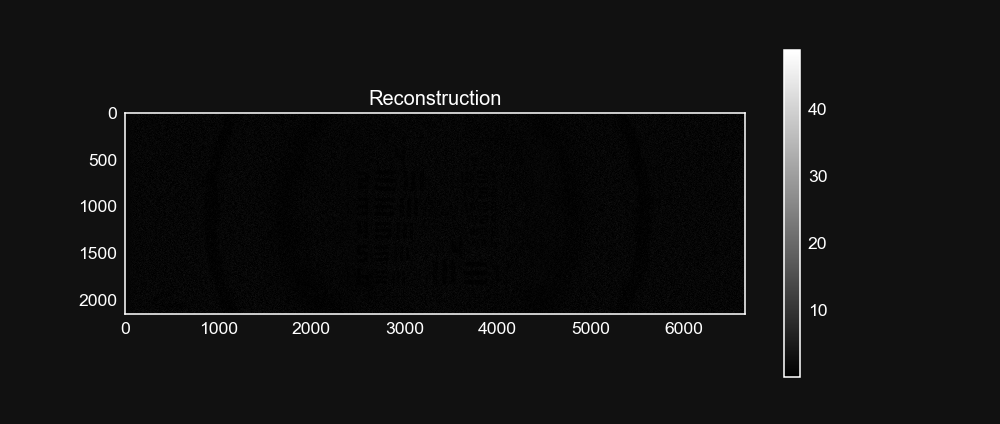

In [12]:
# dataset.motiondeblur.position_segment_indicies = [4]
dataset.frame_mask = [4,5,6]

# Create recon object
recon = md.recon.Reconstruction(dataset, alpha_blend_distance=1000, pad_mode='mean', estimate_background_poly=True)

# Perform reconstruction
recon.reconstruct(iteration_count=100, step_size=1, frame_number=4, mode='global', reg_types={})

# Save result
# recon.save(output_path, filename=recon.dataset.metadata.file_header + '_reprocess', formats=['png', 'npz'], save_raw=True, downsample=4)
recon.show()

In [ ]:
recon.save(output_path, filename=recon.dataset.metadata.file_header + '_reprocess', formats=['png', 'npz'], save_raw=True, downsample=4)

In [ ]:
recon.show()

## Loop Over Segments

In [ ]:
for segment_index in dataset.motiondeblur.position_segment_indicies_full:
    # Set segment index
    dataset.motiondeblur.position_segment_indicies = [segment_index]
    
    # Create recon object
    recon = md.recon.Reconstruction(dataset, alpha_blend_distance=1000, pad_mode='mean', )

    # Perform reconstruction
#     recon.reconstruct(iteration_count=-1, step_size=1, frame_number=4, mode='global', reg_types={'l2': 1e-4})
    recon.reconstruct(iteration_count=100, step_size=1, frame_number=4, mode='global', reg_types={'l2': 1e-4})

    # Save result
    recon.save(output_path, filename=recon.dataset.metadata.file_header, formats=['png', 'npz'], save_raw=True, downsample=4)

In [ ]:
# Try with L1 Sparsity